In [1]:
import tensorflow as tf
from keras.applications import VGG16, ResNet50
from keras.models import Model
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data_dir='./data'
batch_size = 32
image_size = (224, 224)
validation_split = 0.25
inputs = tf.keras.Input(shape=(224, 224, 3))

In [3]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
# Load the ResNet50 model with ImageNet weights
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Extract the feature extractor
feature_extractor = Model(inputs=model.input, outputs=model.layers[-1].output)


# Load your images
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=validation_split,
subset="training",
seed=42,
labels="inferred",
label_mode=None,
image_size=image_size,
batch_size=batch_size)

features_train = feature_extractor.predict(train_ds)

features_train_flattened = np.reshape(features_train, (features_train.shape[0], -1))


SSE = []

# Loop over different numbers of clusters
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster, random_state=0).fit(features_train_flattened)
    SSE.append(kmeans.inertia_)




# kmeans = KMeans(n_clusters=10)
# kmeans.fit(features_train_flattened)




Found 2643 files belonging to 1 classes.
Using 1983 files for training.
62/62 [==============================] - 22s 339ms/step


KeyboardInterrupt: 

[7, 12, None, None, None, None, None]


c:\Users\adam\AppData\Local\Programs\Python\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


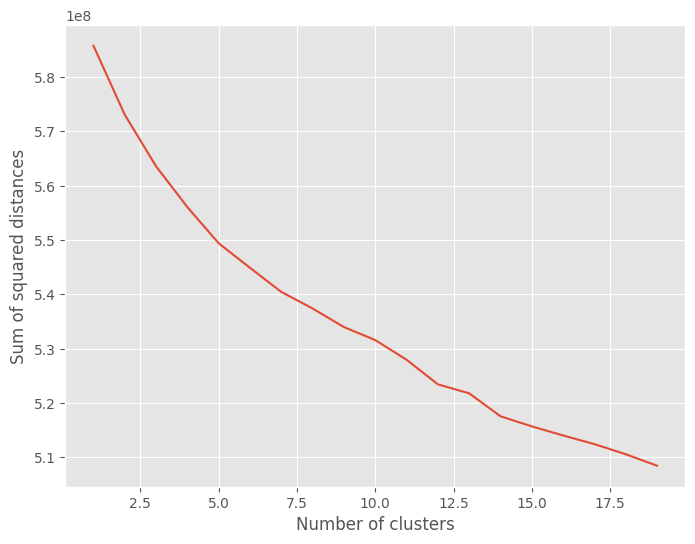

[585797440.0, 573072256.0, 563582016.0, 556062464.0, 549398016.0, 544882560.0, 540437504.0, 537385728.0, 533966464.0, 531571680.0, 527943808.0, 523415904.0, 521762816.0, 517530112.0, 515672032.0, 513997696.0, 512404928.0, 510540768.0, 508427104.0]
7


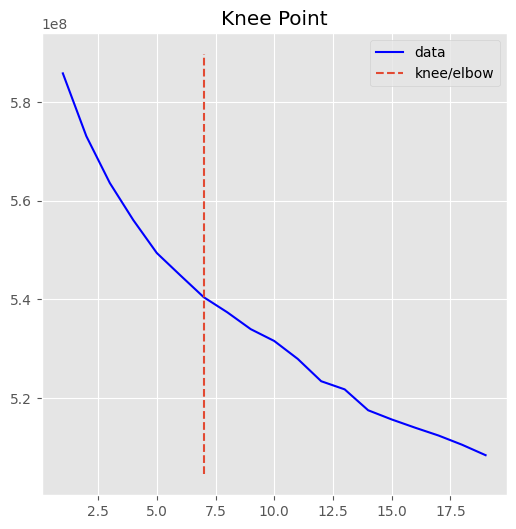

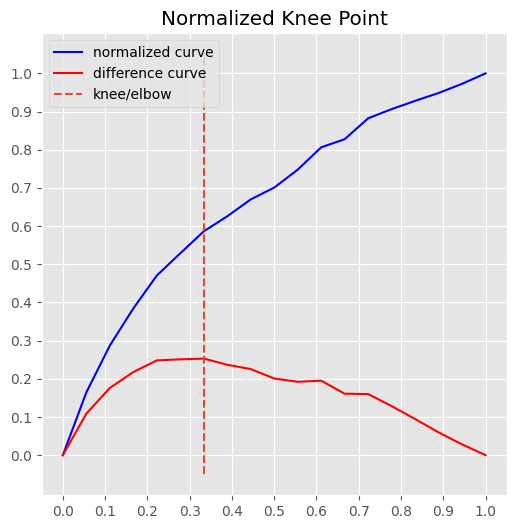

In [27]:
# Determine the elbow in the plot

# Plot the sum of squared distances
plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), SSE)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()
print(SSE)


x = range(1, len(SSE)+1)

from kneed import KneeLocator
kn = KneeLocator(x, SSE, S=1.0, curve='convex', direction='decreasing')
print(kn.elbow)
kn.plot_knee()
kn.plot_knee_normalized()


In [14]:
kmeans.fit(features_train_flattened)

c:\Users\adam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=19, random_state=0)

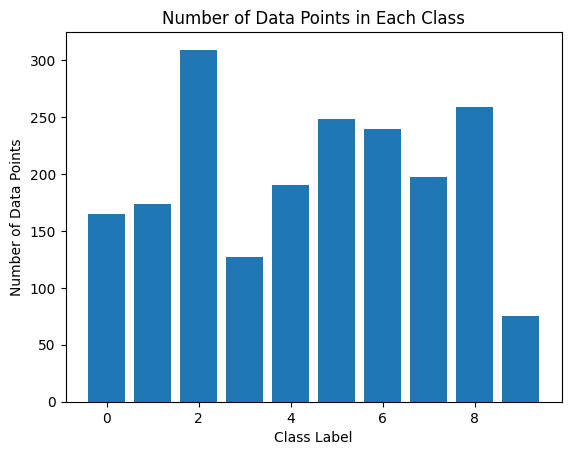

In [ ]:
# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Count the number of data points in each class
class_counts = np.zeros(kmeans.n_clusters)
for i in range(kmeans.n_clusters):
  class_counts[i] = np.sum(cluster_assignments == i)

# Plot the bar plot
plt.bar(range(kmeans.n_clusters), class_counts)
plt.title('Number of Data Points in Each Class')
plt.xlabel('Class Label')
plt.ylabel('Number of Data Points')
plt.show()